In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from CollabFilterOneVectorPerItem import *
from AbstractBaseCollabFilterSGD import *
from train_valid_test_loader import load_train_valid_test_datasets

In [5]:
def parser(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("epoch"):
                parts = line.split("|")
                epoch_data = [float(part.split()[-1]) for part in parts]
                data.append(epoch_data)

    
    columns = ["epoch", "loss_total", "train_MAE", "valid_MAE", "grad_wrt_mu", "grad_wrt_b_per_user", "grad_wrt_c_per_item", "grad_wrt_U", "grad_wrt_V"]
    df = pd.DataFrame(data, columns=columns)
    
    return df


In [6]:
def plot_mae_v_epoch(df):
    x = df['epoch']
    y_train = df['train_MAE']
    y_valid = df['valid_MAE']
    plt.plot(x, y_train, label='Train MAE')
    plt.plot(x, y_valid, label='Valid MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs epoch')
    plt.grid()
    plt.show()

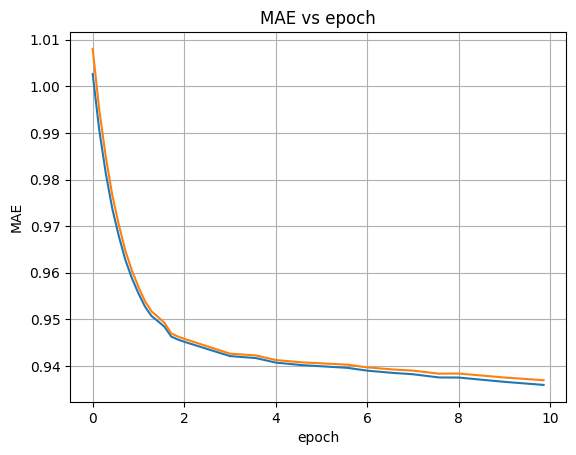

In [7]:
k2_df = parser("output_K2.txt")
plot_mae_v_epoch(k2_df)

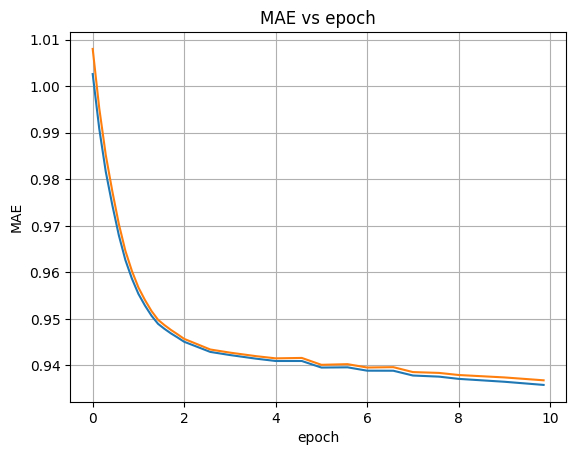

In [8]:
k10_df = parser("output_K10.txt")
plot_mae_v_epoch(k10_df)

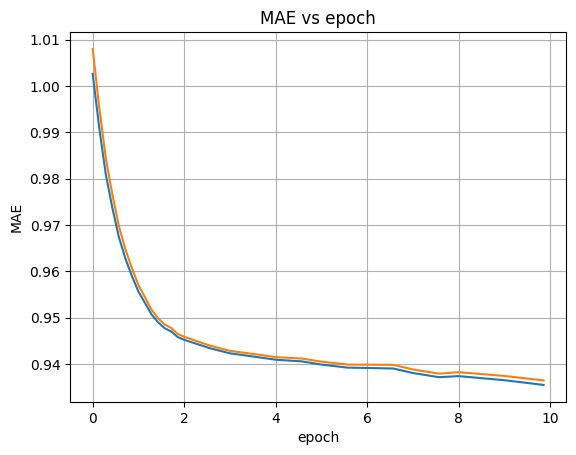

In [9]:
k50_df = parser("output_K50.txt")
plot_mae_v_epoch(k50_df)

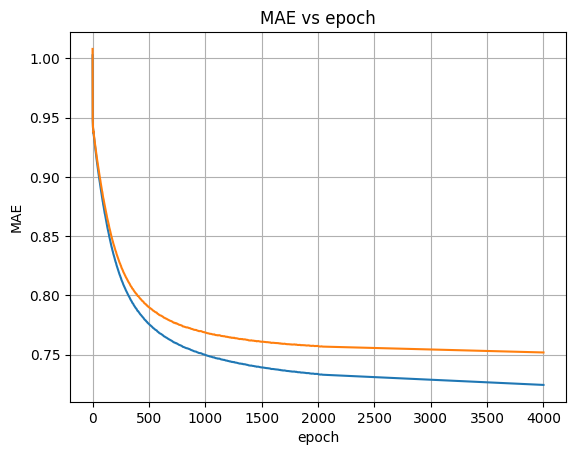

In [61]:
ktemp50_df = parser("temp.txt")
plot_mae_v_epoch(ktemp50_df)

In [ ]:
import itertools

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 50, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

In [77]:
import sys
from contextlib import redirect_stdout

# a, b, s = combination[bestIndex]
a, b, s = (0.001, 50, 0.1)

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 50, alpha=a)
model.init_parameter_dict(n_users, n_items, train_tuple)

with open("partB_output.txt", "w") as f:
    with redirect_stdout(f):
        model.fit(train_tuple, valid_tuple)

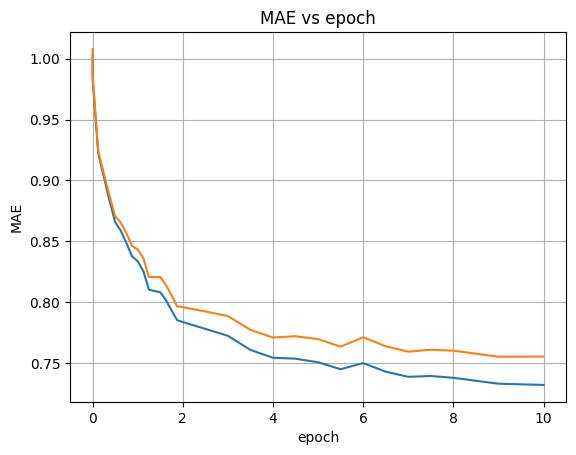

In [10]:
kB_df = parser("partB_output.txt")
plot_mae_v_epoch(kB_df)

In [11]:
print(kB_df["valid_MAE"])

0     1.00801
1     1.00308
2     0.99197
3     0.98644
4     0.92433
5     0.90576
6     0.88743
7     0.87063
8     0.86540
9     0.85653
10    0.84613
11    0.84341
12    0.83616
13    0.82076
14    0.82059
15    0.82077
16    0.81422
17    0.80588
18    0.79660
19    0.79596
20    0.79244
21    0.78864
22    0.77732
23    0.77103
24    0.77207
25    0.76974
26    0.76351
27    0.77125
28    0.76383
29    0.75943
30    0.76098
31    0.76021
32    0.75525
33    0.75535
Name: valid_MAE, dtype: float64


#### Part C

In [ ]:
import itertools

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 10, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

a, b, s = combination[bestIndex]

print(a, b, s)

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 2, alpha=a)
model.init_parameter_dict(n_users, n_items, train_tuple)

with open("partC_K2_output.txt", "w") as f:
    sys.stdout = f
    model.fit(train_tuple, valid_tuple)
    sys.stdout = sys.__stdout__

0.1 50 0.1
trial  1
currMin  inf
epoch       0.000 | loss_total     1.96000 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     1.76000 | grad_wrt_b_per_user     0.00246 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     1.61782 | train_MAE     1.00242 | valid_MAE     1.00779 | grad_wrt_mu     1.23648 | grad_wrt_b_per_user     0.00208 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.001 | loss_total     1.05628 | train_MAE     1.00228 | valid_MAE     1.00765 | grad_wrt_mu     1.23398 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.002 | loss_total     1.75562 | train_MAE     1.00215 | valid_MAE     1.00750 | grad_wrt_mu     1.03151 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.125 | loss_to

In [81]:
print(a, b, s)

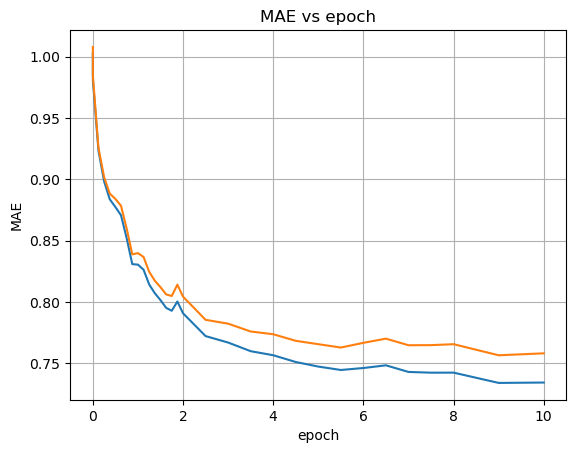

In [17]:
kB_df = parser("partC_K2_output.txt")
plot_mae_v_epoch(kB_df)

In [14]:
import itertools
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 10, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

a, b, s = combination[bestIndex]

print(a, b, s)

# train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
# model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 10, alpha=a)
# model.init_parameter_dict(n_users, n_items, train_tuple)

# with open("partC_K10_output.txt", "w") as f:
#     sys.stdout = f
#     model.fit(train_tuple, valid_tuple)
#     sys.stdout = sys.__stdout__

trial  1
currMin  inf
new currMin  0.9292490714039353
trial  2
currMin  0.9292490714039353
new currMin  0.8394597057005005
trial  3
currMin  0.8394597057005005
new currMin  0.7551756532665753
trial  4
currMin  0.7551756532665753


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:33: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: invalid value encountered in subtract
  arr[:] = arr - self.step_size * grad_dict[key]
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value 

new currMin  0.7551756532665753
trial  5
currMin  0.7551756532665753


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


new currMin  0.7551756532665753
trial  6
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  7
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  8
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  9
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  10
currMin  0.7551756532665753


/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/CollabFilterOneVectorPerItem.py:88: RuntimeWarning: overflow encountered in multiply
  return mu + b_per_user[user_id_N] + c_per_item[item_id_N] + ag_np.sum(U[user_id_N] * V[item_id_N], axis = 1)
/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:72: RuntimeWarning: overflow encountered in square
  mse = np.mean(np.square(yhat_N - ratings_N))


new currMin  0.7551756532665753
trial  11
currMin  0.7551756532665753


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:698: RuntimeWarning: invalid value encountered in at
  onp.add.at(A, idx, x)


new currMin  0.7551756532665753
trial  12
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  13
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  14
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  15
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  16
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  17
currMin  0.7551756532665753


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:58: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),


new currMin  0.7551756532665753
trial  18
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  19
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  20
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  21
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  22
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  23
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  24
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  25
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  26
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  27
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  28
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  29
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  30
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  31
currMin  0.7551756532665753
new currMin  0.75517

/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: overflow encountered in multiply
  arr[:] = arr - self.step_size * grad_dict[key]


new currMin  0.7551756532665753
trial  115
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  116
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  117
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  118
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  119
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  120
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  121
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  122
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  123
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  124
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  125
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  126
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  127
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  128
currMin  0.7551756532665753
new cu

/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:698: RuntimeWarning: overflow encountered in add
  onp.add.at(A, idx, x)
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:698: RuntimeWarning: invalid value encountered in add
  onp.add.at(A, idx, x)


new currMin  0.7551756532665753
trial  138
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  139
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  140
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  141
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  142
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  143
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  144
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  145
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  146
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  147
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  148
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  149
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  150
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  151
currMin  0.7551756532665753
new cu

/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


new currMin  0.7551756532665753
trial  210
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  211
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  212
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  213
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  214
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  215
currMin  0.7551756532665753
new currMin  0.7551756532665753
trial  216
currMin  0.7551756532665753
new currMin  0.7551756532665753
0.001 50 0.1


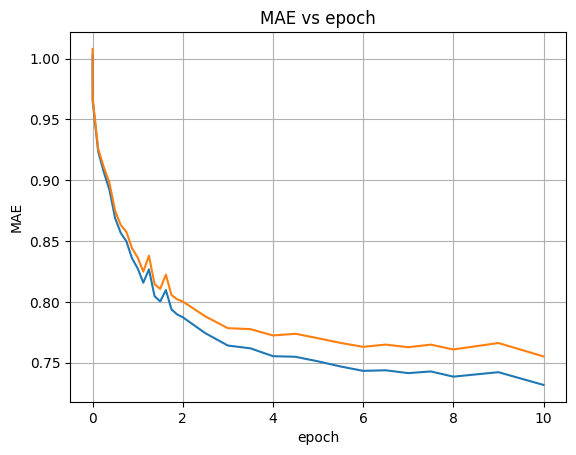

In [7]:
kB_df = parser("partC_K10_output.txt")
plot_mae_v_epoch(kB_df)